In [1]:
# install.packages("GGally")
# install.packages("janitor")

In [11]:
library(tidyverse)
library(repr)
library(digest)
library(infer)
library(cowplot)
library(broom)
library(funModeling) 
library(Hmisc)
library(GGally)
library(car)
library(janitor)
library(scales)

### Exploratory Data Analysis
#### Preliminary Results

In [3]:
# data downloaded from web into R
data<- read.csv("https://raw.githubusercontent.com/Zibo-S/STAT301_GP_4/main/insurance.csv", header= TRUE)

In [4]:
# make sure data is in a tidy format
data%>%head(3)

,age,sex,bmi,children,smoker,region,charges
,<int>,<chr>,<dbl>,<int>,<chr>,<chr>,<dbl>
1,19,female,27.90,0,yes,southwest,16884.924
2,18,male,33.77,1,no,southeast,1725.552
3,28,male,33.00,3,no,southeast,4449.462


In [5]:
data%>% status()

,variable,q_zeros,p_zeros,q_na,p_na,q_inf,p_inf,type,unique
,<chr>,<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<chr>,<int>
age,age,0,0.0000000,0,0,0,0,integer,47
sex,sex,0,0.0000000,0,0,0,0,character,2
bmi,bmi,0,0.0000000,0,0,0,0,numeric,548
children,children,574,0.4289985,0,0,0,0,integer,6
smoker,smoker,0,0.0000000,0,0,0,0,character,2
region,region,0,0.0000000,0,0,0,0,character,4
charges,charges,0,0.0000000,0,0,0,0,numeric,1337


Target Variable: Charges

Response Variables - Categorical: 'sex','children', 'smoker', 'region',
Response Variables - Continuous: 'age','bmi'

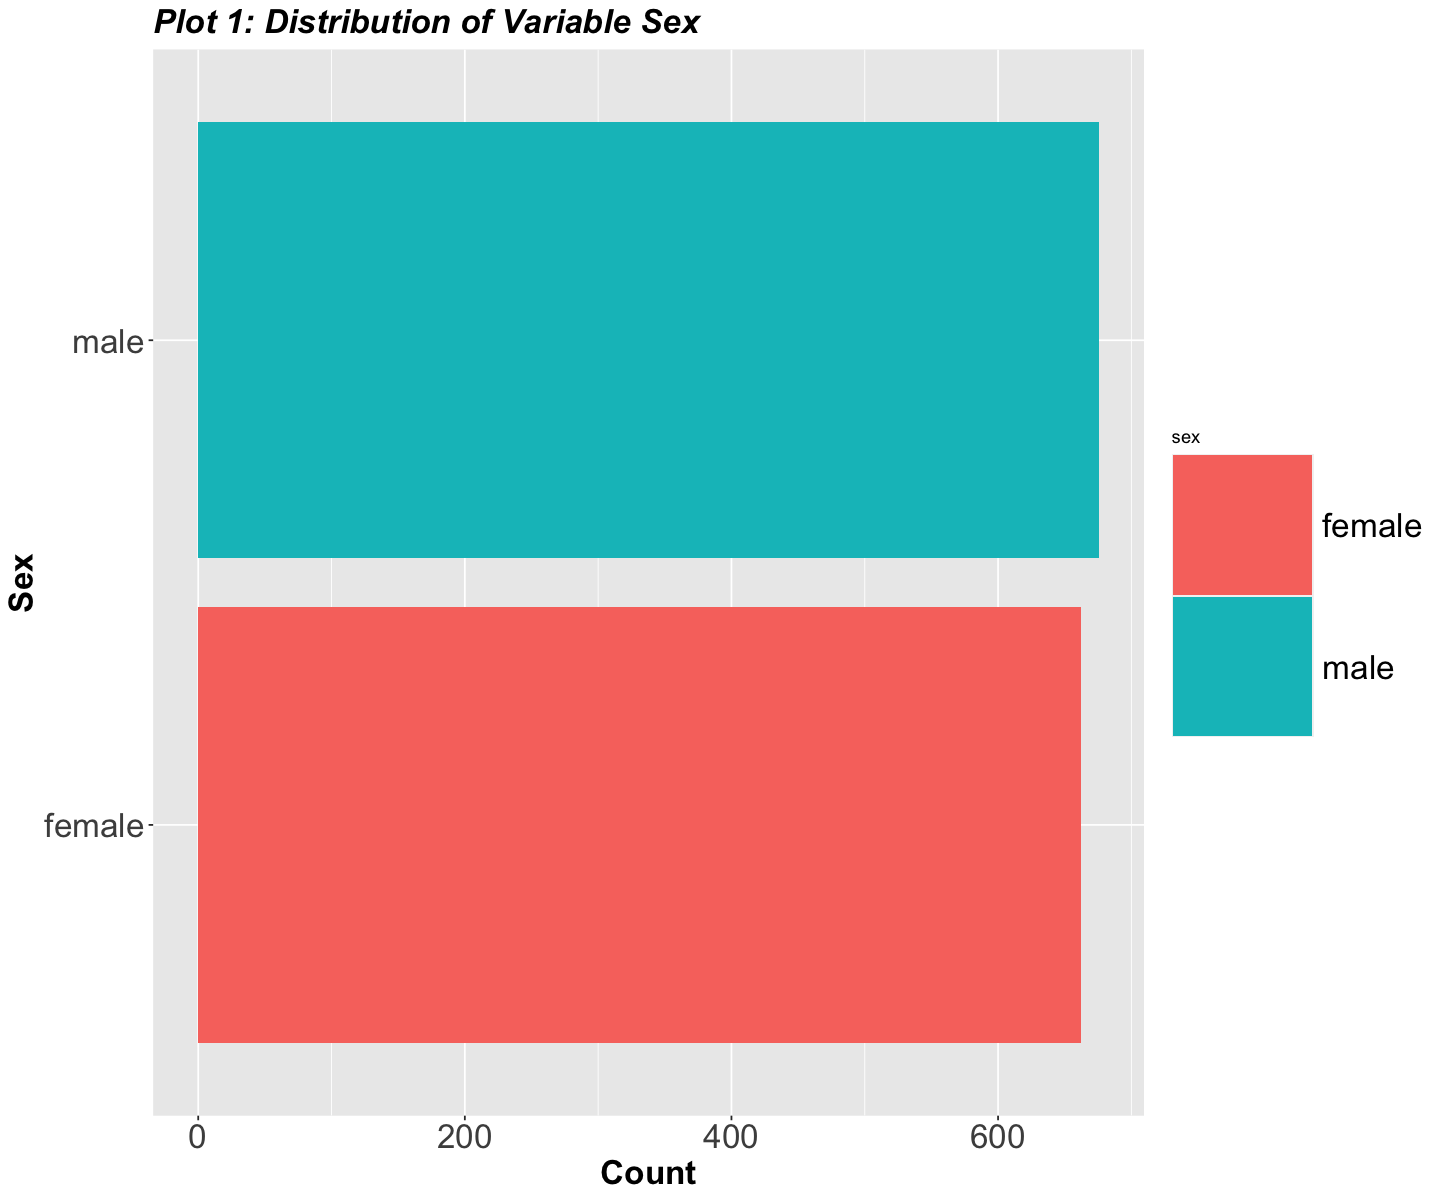

In [91]:
options(repr.plot.width = 12, repr.plot.height = 10)

plot1<- ggplot(data, aes(y = sex, fill = sex)) +
  geom_bar() + xlab("Count") +
   ylab("Sex")+ ggtitle("Plot 1: Distribution of Variable Sex")
plot1 + theme(
plot.title = element_text(color="black", size=20, face="bold.italic"),
axis.title.x = element_text(color="black", size=20, face="bold"),
axis.text = element_text(size = 20),
legend.key.size = unit(3, 'cm'),
legend.text = element_text(size=20),
axis.title.y = element_text(color="black", size=20, face="bold")
)

Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


     sex frequency percentage cumulative_perc
1   male       676      50.52           50.52
2 female       662      49.48          100.00



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


  smoker frequency percentage cumulative_perc
1     no      1064      79.52           79.52
2    yes       274      20.48          100.00



Warning message:
“`guides(<scale> = FALSE)` is deprecated. Please use `guides(<scale> = "none")` instead.”


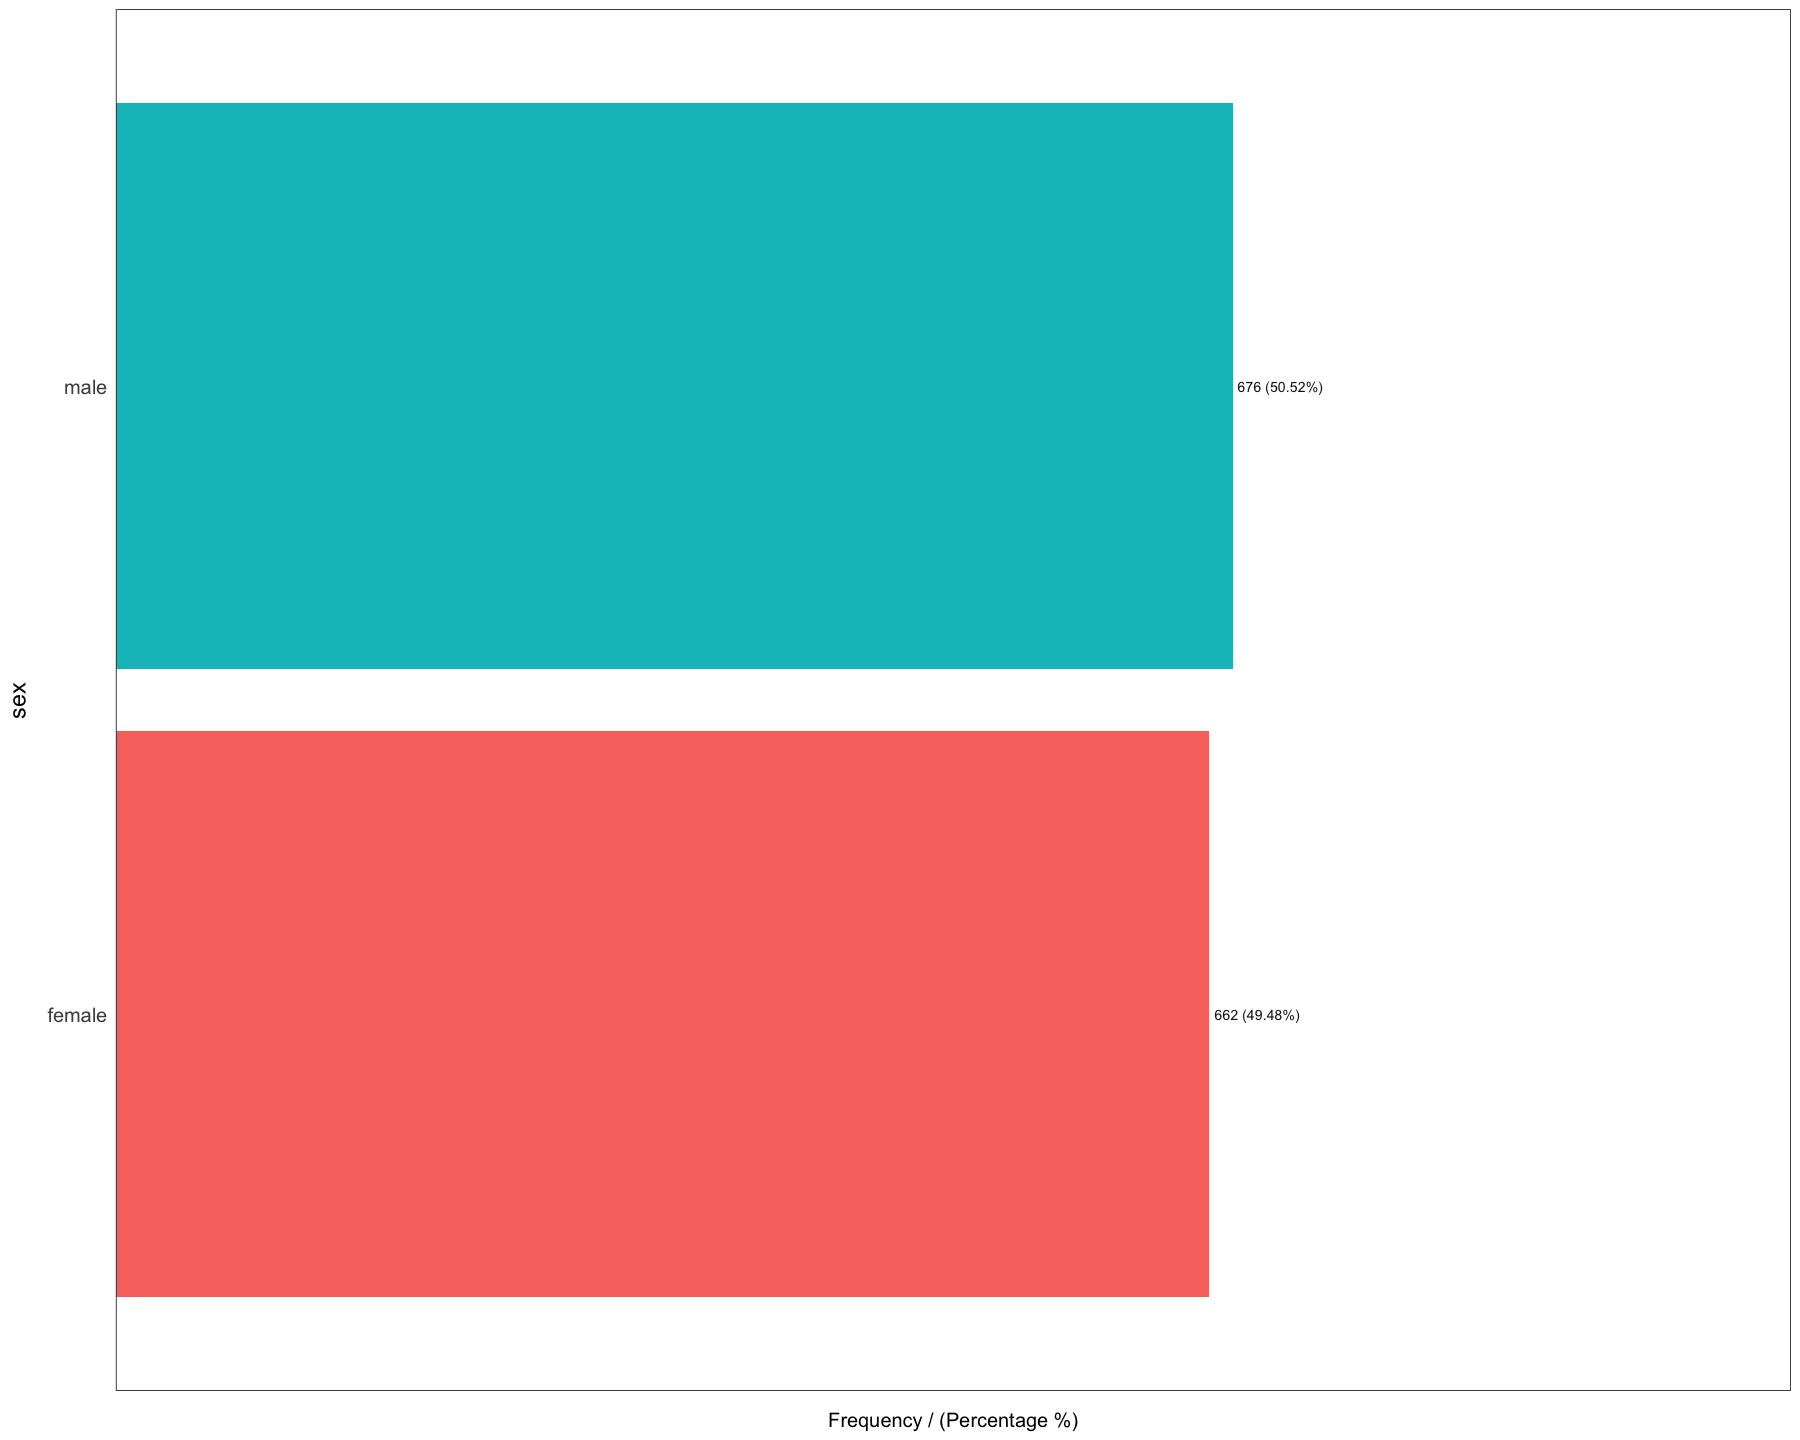

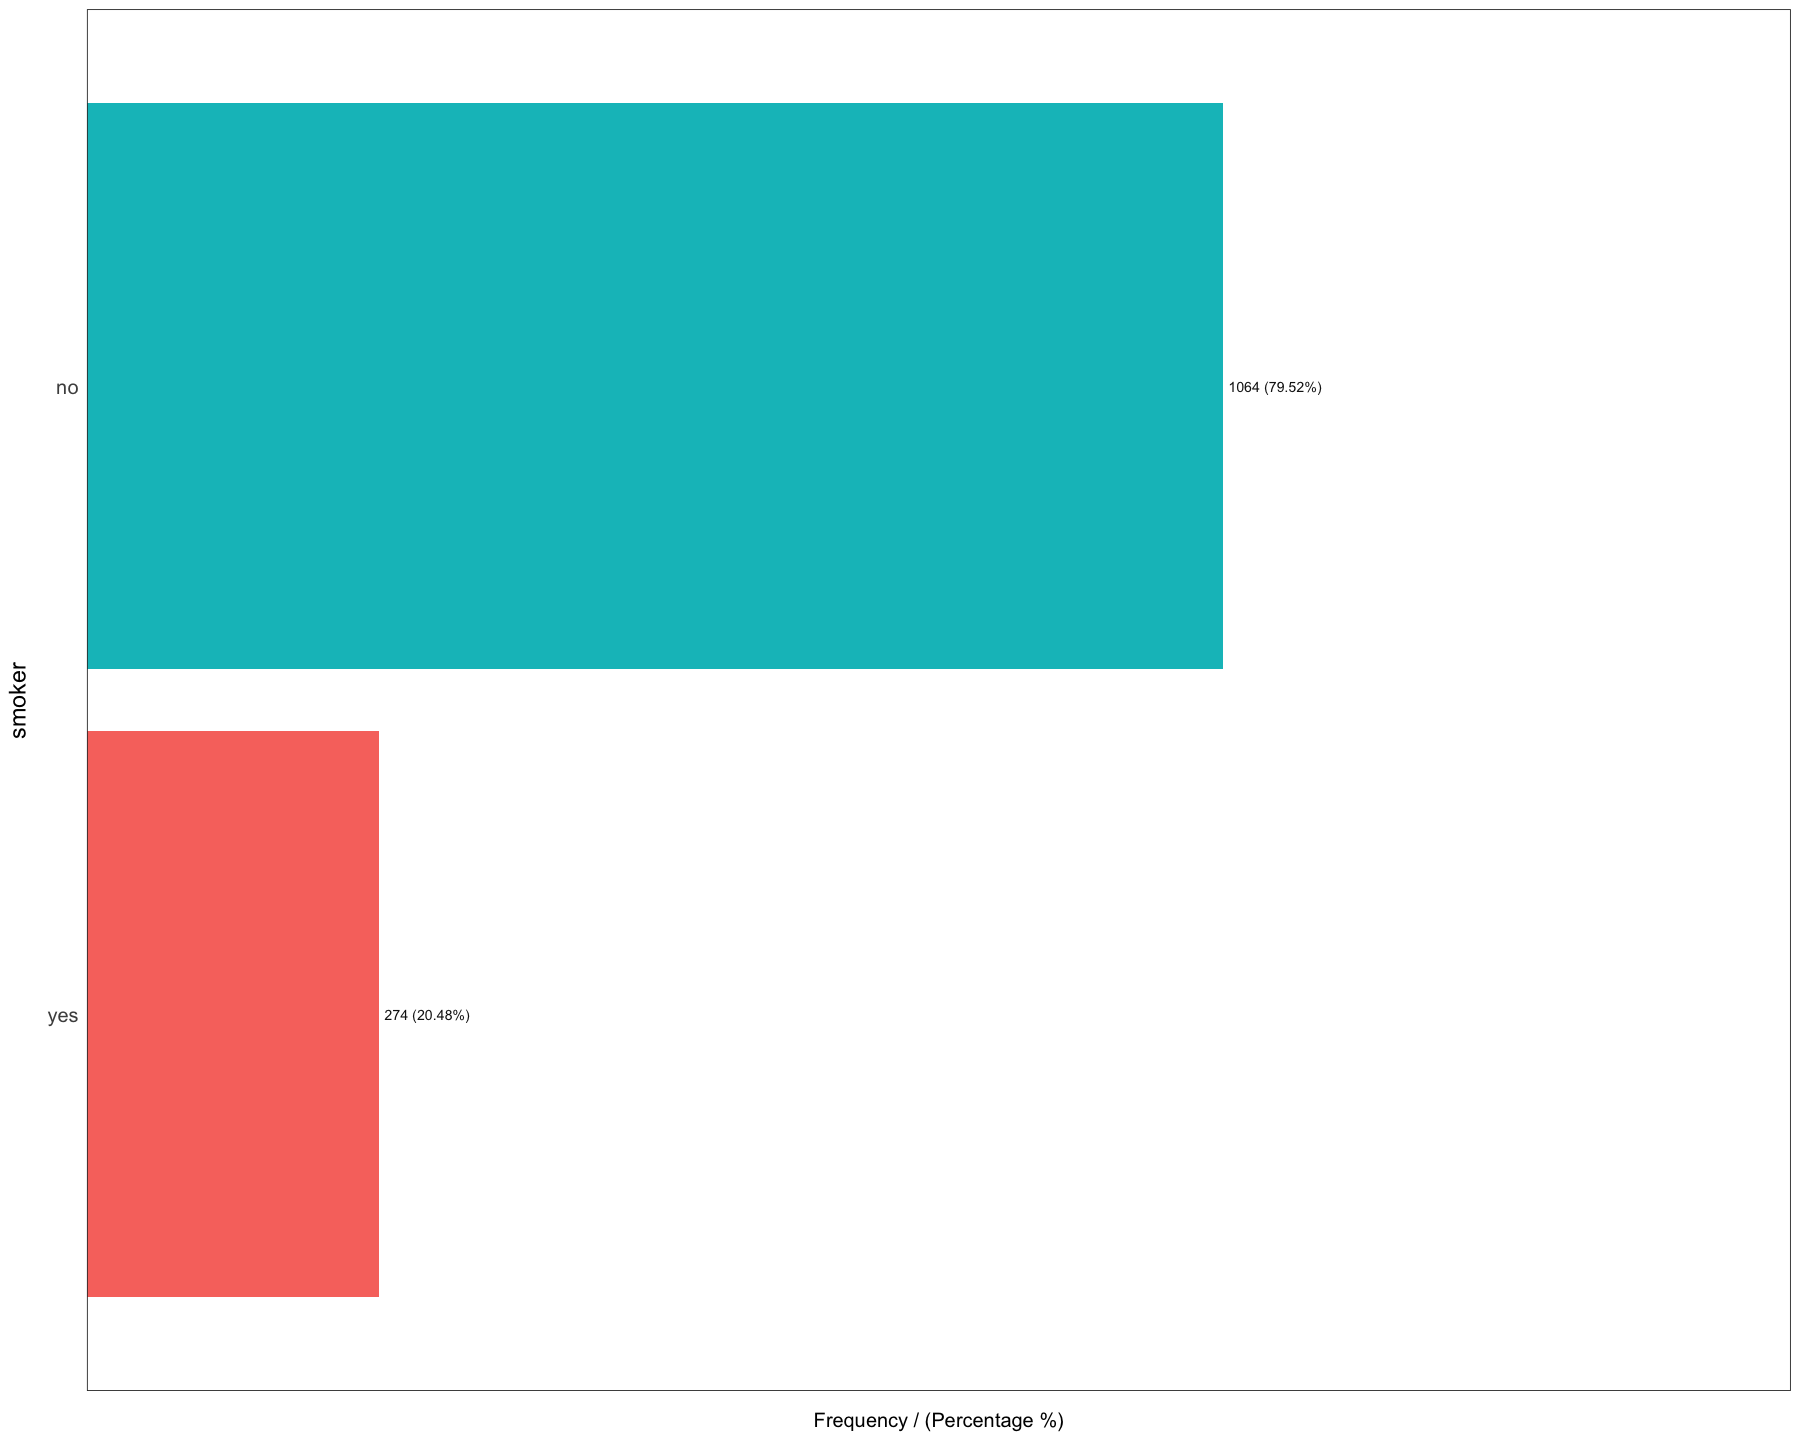

     region frequency percentage cumulative_perc
1 southeast       364      27.20           27.20
2 northwest       325      24.29           51.49
3 southwest       325      24.29           75.78
4 northeast       324      24.22          100.00



[1] "Variables processed: sex, smoker, region"

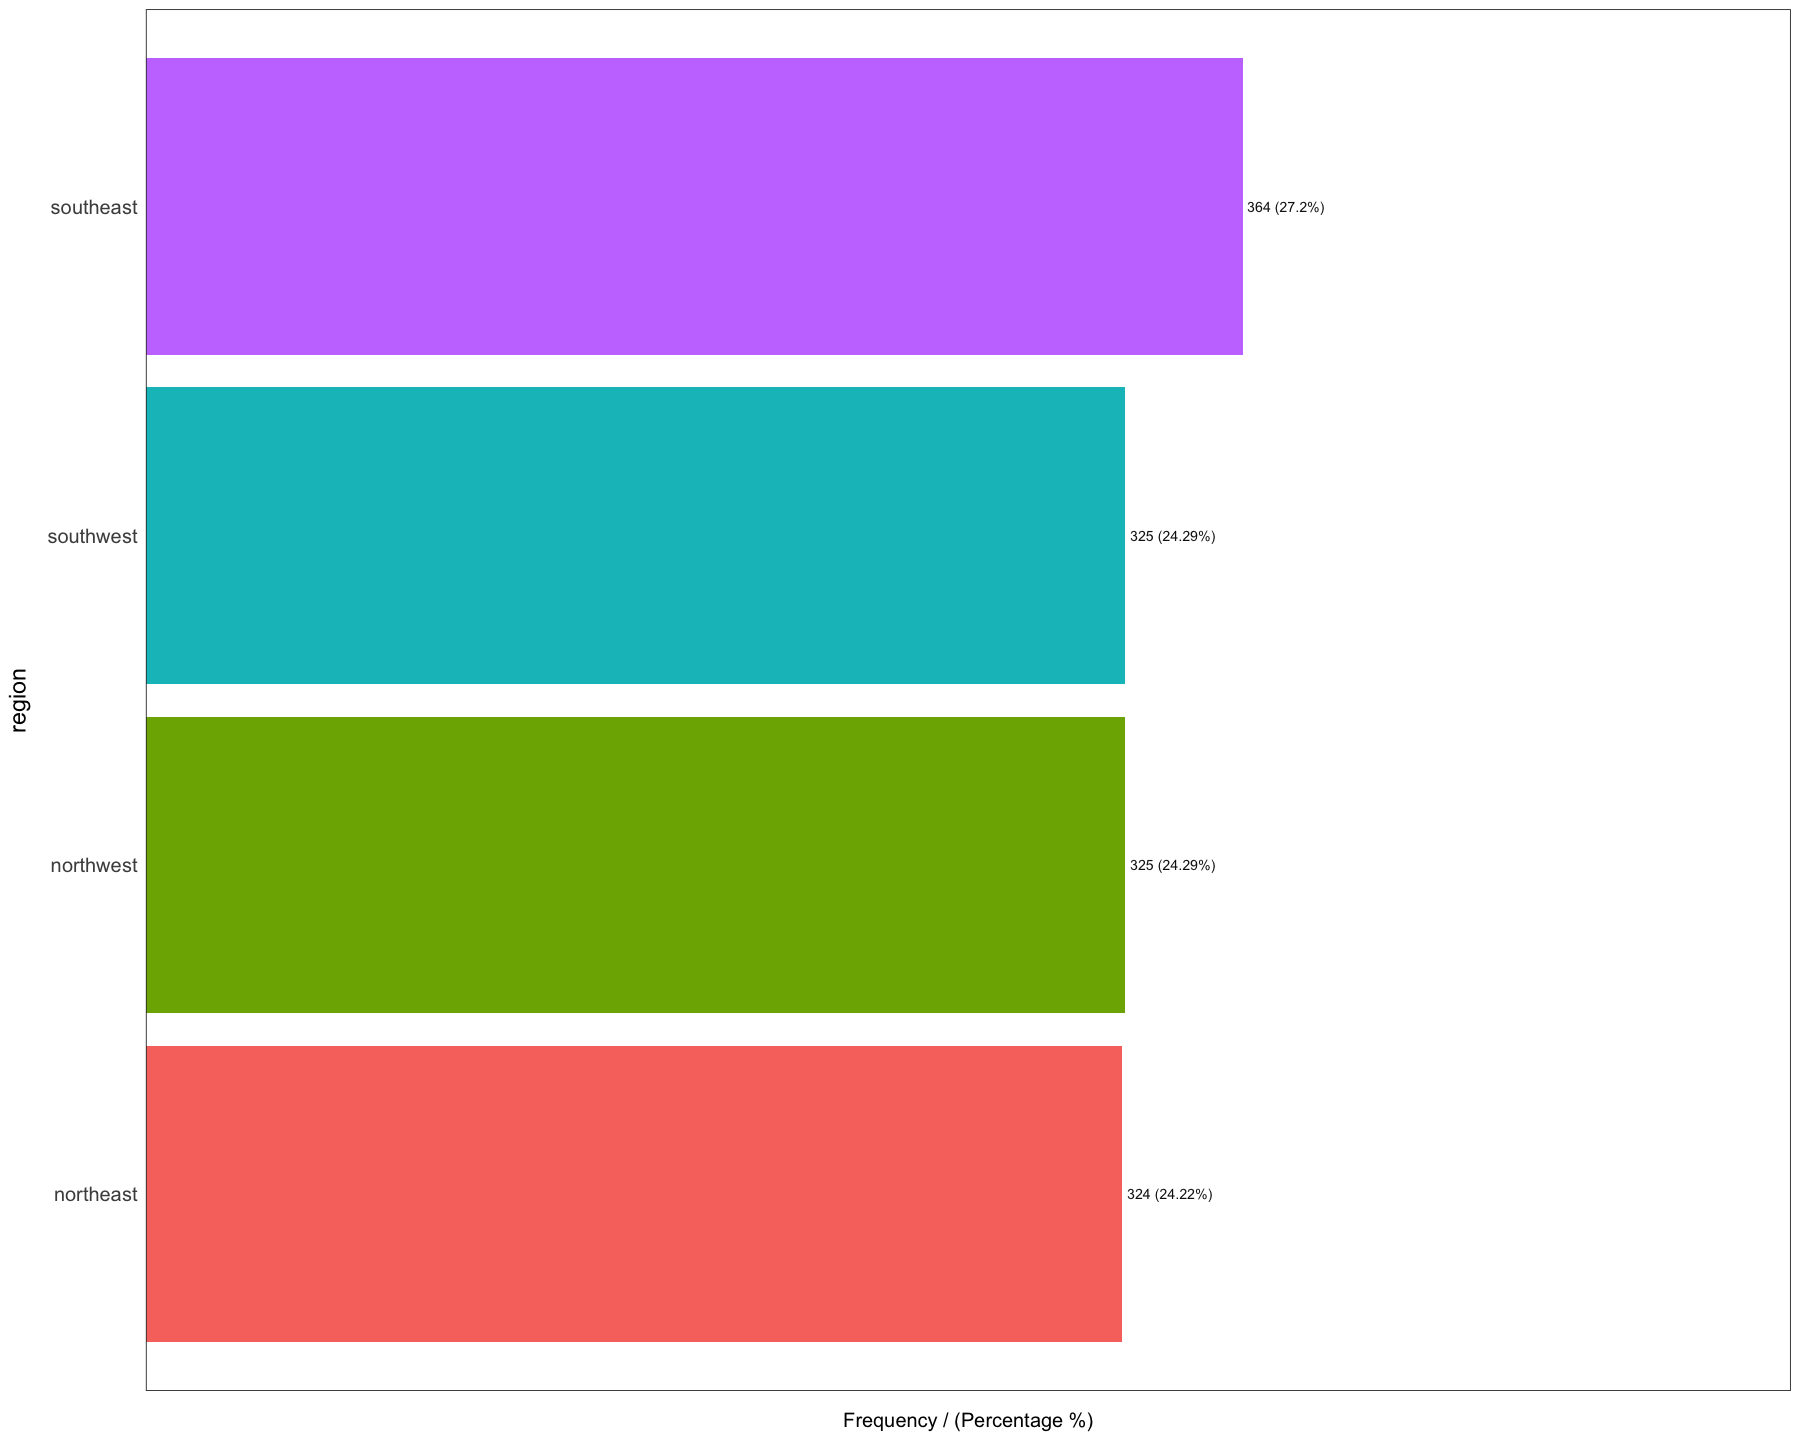

In [21]:
freq(data)

#### Visualizing the association between variables in dataset

In [16]:
options(repr.plot.width = 15, repr.plot.height = 12)

data_pair_plots <- data %>%
  ggpairs(lower = list(combo = wrap(ggally_facethist, binwidth = 0.5))) +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"))
data_pair_plots

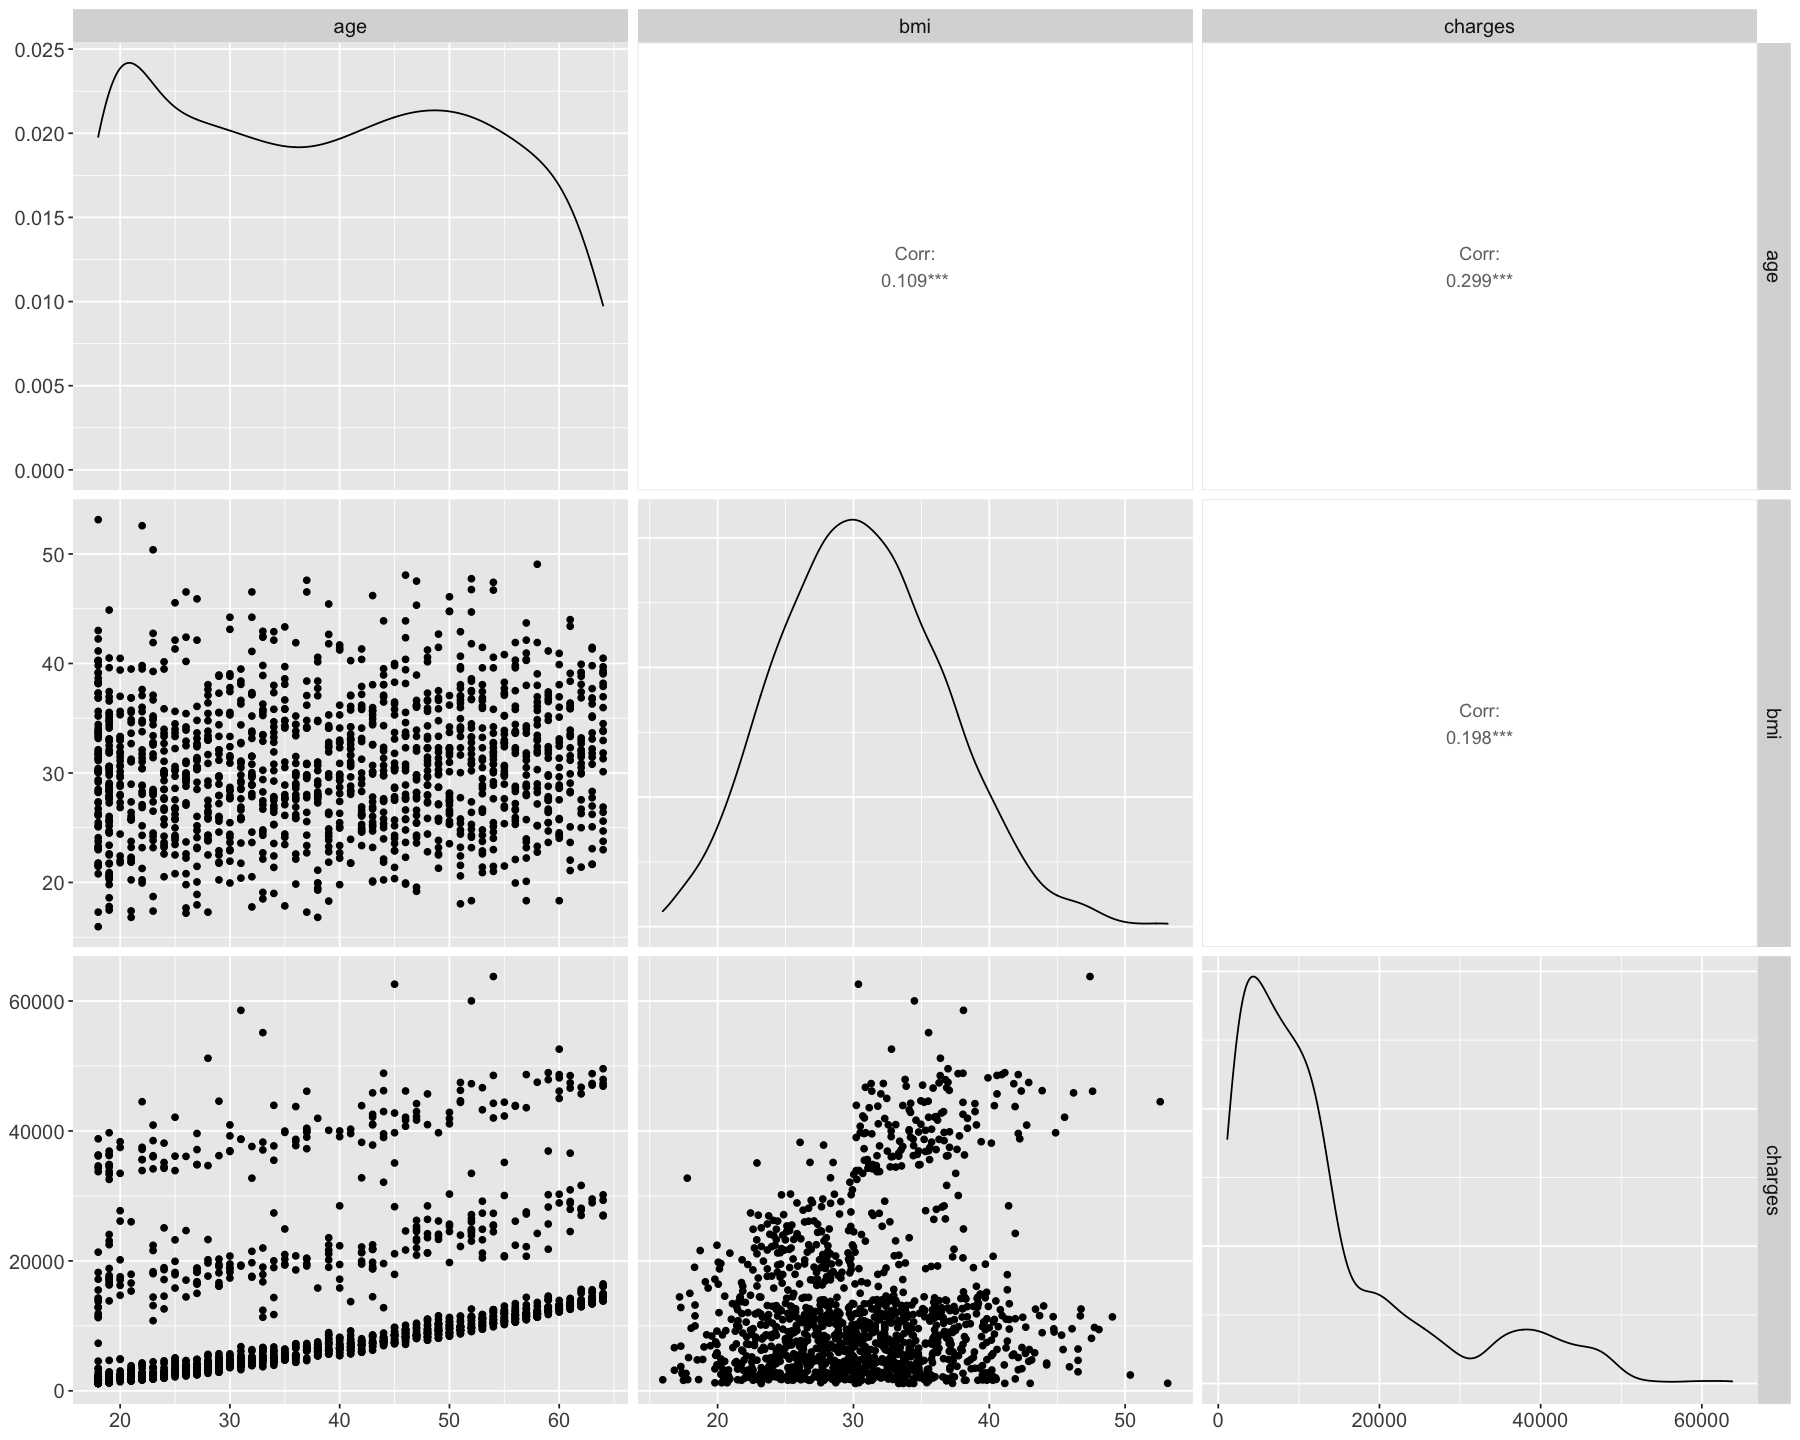

In [10]:
options(repr.plot.width = 15, repr.plot.height = 12)
contunuous_variable<- data%>%select('age','bmi','charges')%>%as.data.frame() 
# contunuous_variable
data_pair_plots <- contunuous_variable%>%
  ggpairs() +
  theme(
    text = element_text(size = 15),
    plot.title = element_text(face = "bold"),
    axis.title = element_text(face = "bold"))
data_pair_plots

Based on the pairwise plots and correlation coefficients in data_pair_plots,<br>
There has no obvious multicolinearly variables


In [12]:
# heatmap
corr_matrix_data <- data %>%ungroup() %>%
select('age','bmi','charges') %>%
  cor() %>%
  as.data.frame() %>%
  rownames_to_column("var1") %>%
  pivot_longer(-var1, names_to = "var2", values_to = "corr")
corr_matrix_data 

var1,var2,corr
<chr>,<chr>,<dbl>
age,age,1.0000000
age,bmi,0.1092719
age,charges,0.2990082
bmi,age,0.1092719
bmi,bmi,1.0000000
bmi,charges,0.1983410
charges,age,0.2990082
charges,bmi,0.1983410
charges,charges,1.0000000


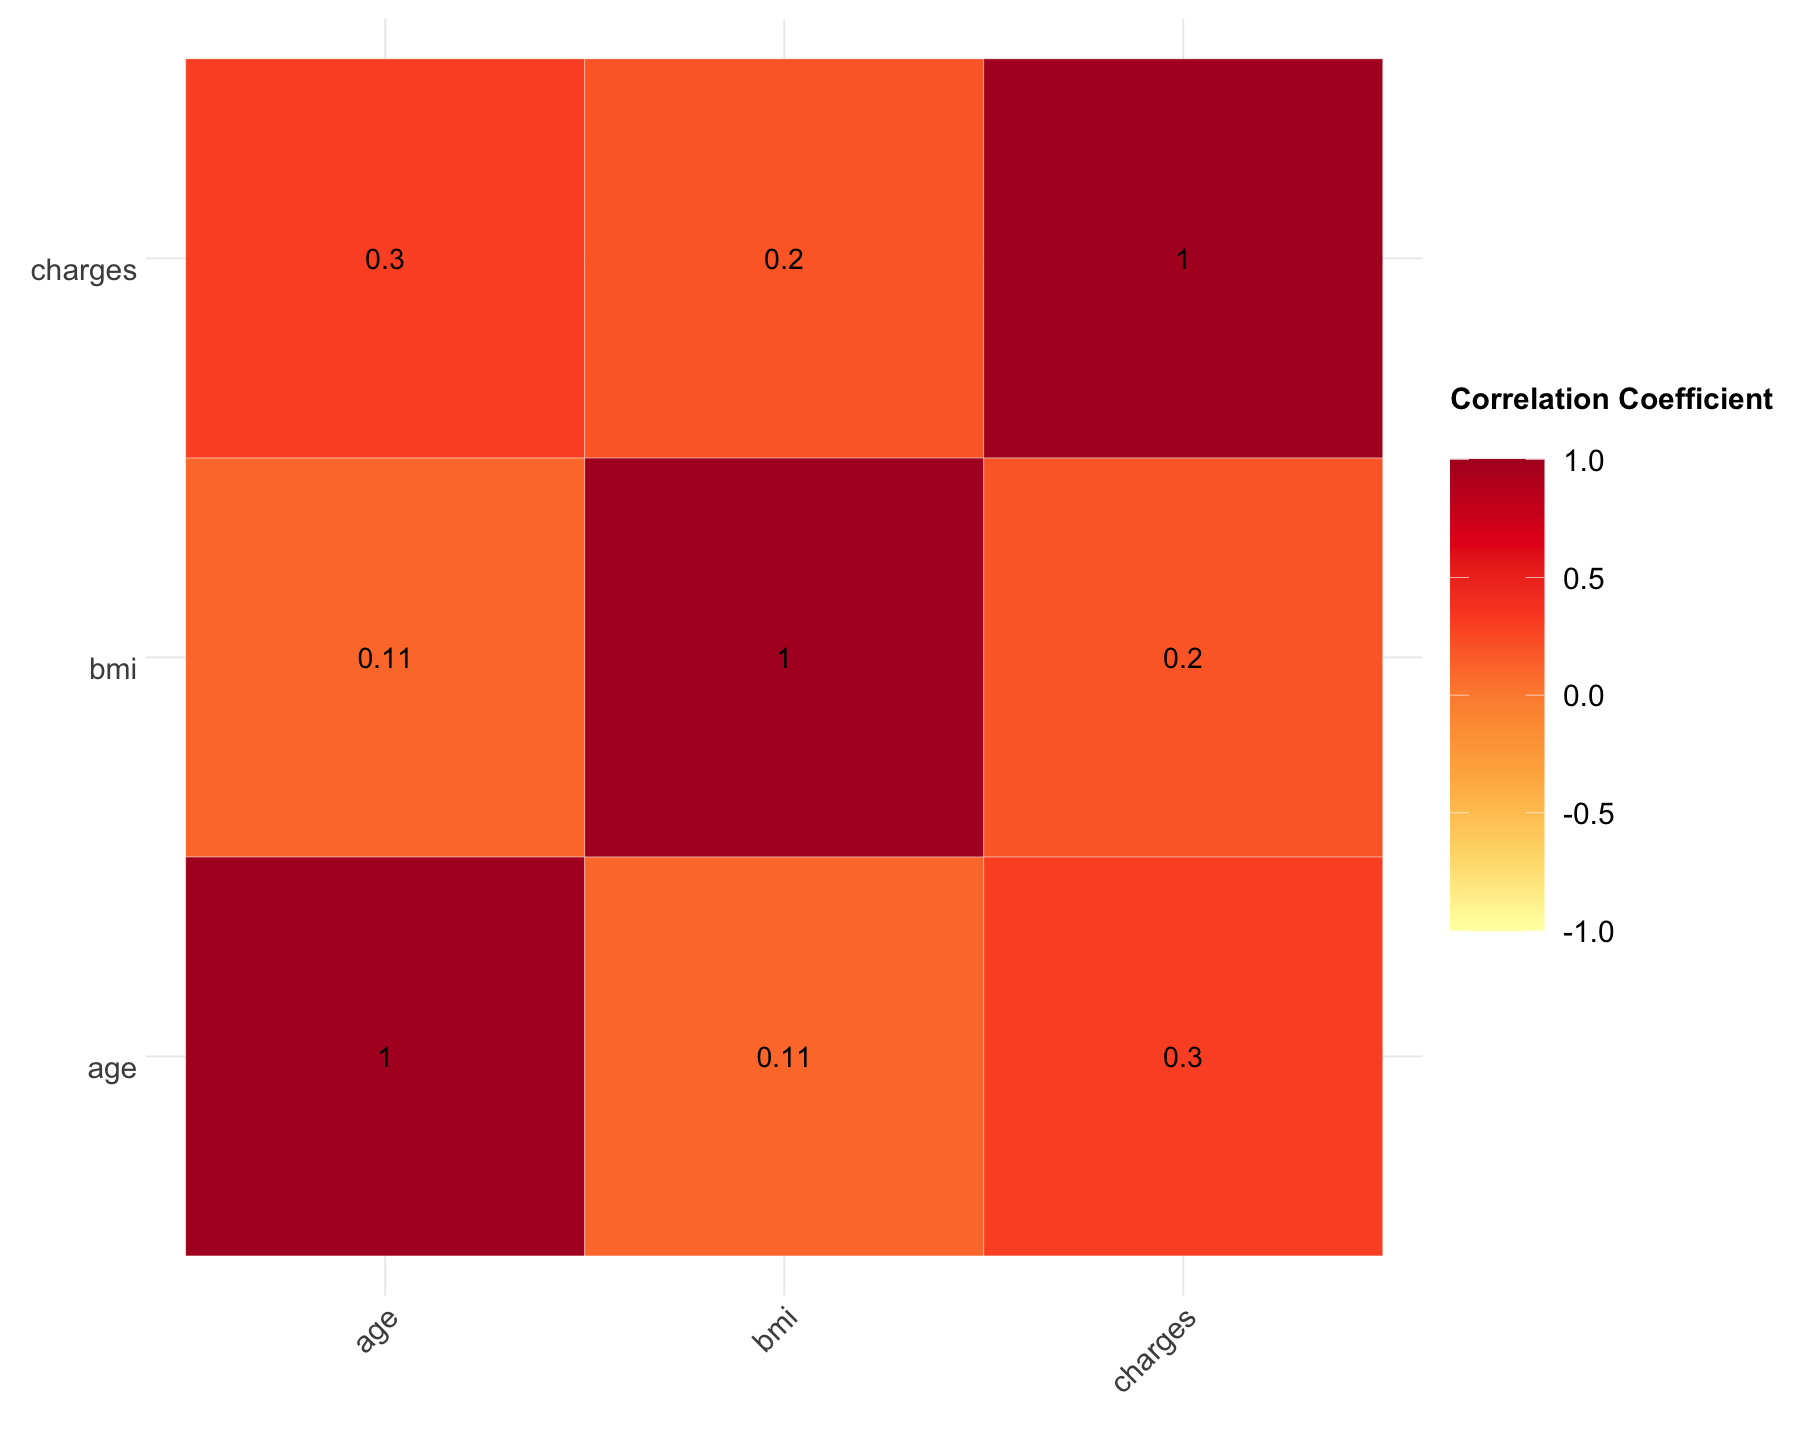

In [13]:
plot_corr_matrix_data <- corr_matrix_data %>%
  ggplot(aes(var1, var2)) +
  geom_tile(aes(fill = corr), color = "white") +
  scale_fill_distiller("Correlation Coefficient \n",
    palette = "YlOrRd",
    direction = 1, limits = c(-1, 1)
  ) +
  labs(x = "", y = "") +
  theme_minimal() +
  theme(
    axis.text.x = element_text(
      angle = 45, vjust = 1,
      size = 18, hjust = 1
    ),
    axis.text.y = element_text(
      vjust = 1,
      size = 18, hjust = 1
    ),
    legend.title = element_text(size = 18, face = "bold"),
    legend.text = element_text(size = 18),
    legend.key.size = unit(2, "cm")
  ) +
  coord_fixed() +
  geom_text(aes(var2, var1, label = round(corr, 2)), color = "black", size = 6)
plot_corr_matrix_data

In [14]:
MLR <- lm(formula = charges ~ ., data = data)

MLR_results <- tidy(MLR) %>% mutate_if(is.numeric, round, 2)
MLR_results

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-11938.54,987.82,-12.09,0.00
age,256.86,11.90,21.59,0.00
sexmale,-131.31,332.95,-0.39,0.69
bmi,339.19,28.60,11.86,0.00
children,475.50,137.80,3.45,0.00
smokeryes,23848.53,413.15,57.72,0.00
regionnorthwest,-352.96,476.28,-0.74,0.46
regionsoutheast,-1035.02,478.69,-2.16,0.03
regionsouthwest,-960.05,477.93,-2.01,0.04


In [15]:
# GVIF: the square root of the VIF for individual predictors and thus can be used equivalently.
VIF_MLR_data<- vif(MLR)
round(VIF_MLR_data, 3)

,GVIF,Df,GVIF^(1/(2*Df))
age,1.017,1,1.008
sex,1.009,1,1.004
bmi,1.107,1,1.052
children,1.004,1,1.002
smoker,1.012,1,1.006
region,1.099,3,1.016


**All GVIF values are rather moderate (around 1)and this is not an indication of multicollinearity.**

### Check for Confounding

In [19]:
summary(MLR)


Call:
lm(formula = charges ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-11304.9  -2848.1   -982.1   1393.9  29992.8 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     -11938.5      987.8 -12.086  < 2e-16 ***
age                256.9       11.9  21.587  < 2e-16 ***
sexmale           -131.3      332.9  -0.394 0.693348    
bmi                339.2       28.6  11.860  < 2e-16 ***
children           475.5      137.8   3.451 0.000577 ***
smokeryes        23848.5      413.1  57.723  < 2e-16 ***
regionnorthwest   -353.0      476.3  -0.741 0.458769    
regionsoutheast  -1035.0      478.7  -2.162 0.030782 *  
regionsouthwest   -960.0      477.9  -2.009 0.044765 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 6062 on 1329 degrees of freedom
Multiple R-squared:  0.7509,	Adjusted R-squared:  0.7494 
F-statistic: 500.8 on 8 and 1329 DF,  p-value: < 2.2e-16


In [20]:
aov(MLR)

Call:
   aov(formula = MLR)

Terms:
                         age          sex          bmi     children
Sum of Squares   17530192183    791665482   5257642817    551112172
Deg. of Freedom            1            1            1            1
                      smoker       region    Residuals
Sum of Squares  122870644862    233431209  48839532844
Deg. of Freedom            1            3         1329

Residual standard error: 6062.102
Estimated effects may be unbalanced